# Candy Analytics – Data Science Case Study 
## Topic: Expanding candy brand of the discount supermarket chain
## Highlight: t-Distributed Stochastic Neighbor Embedding (t-SNE) for the visualization of the full candy assortment
## by Pavel Lesnevski

The data is from https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking

### Motivation

#### Formula
$\text{Net Profit} = \text{Profit from new Product} - \text{Loss due to old Products} = \text{Profit Margin new * Sales new} - \text{Profit Margin old * Sales old}$

*Solution:*
* Introduce totally new products that do not cannibalize sales of old products
* Introduce products that copy the existing products but have higher margins for our supermarket chain 

#### Needed Information and Assumptions
*Information on:*
* Product offerings 
* Margins on products
* Sales
* Effect of introduction of new products on sales


*Assumptions:*
* All products are offered in our shops
* Winpercent is a proxy for the attractiveness of a given product/taste
* The higher the price the higher the margin of a given product
* Sales are proportional to the attractiveness of products
* Introduction of a new product results in higher sales of the new product than a loss in the existing product

### Import 

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Statistical Analysis
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Timing
import time

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
mpl.style.use("ggplot")
sns.set()
sns.set_palette('deep6')
sns.set_style({'patch.edgecolor': '0.2'})
rcParams['figure.figsize'] = 11.7,8.27
%matplotlib inline


### Exploratory Data Analysis - Factors Influencing Product Success 

In [3]:
# Read Data Set
dfo = pd.read_csv("data.csv")
dfo.set_index(dfo['competitorname'],inplace = True)
dfo.drop(columns=['competitorname'],inplace=True)
df = dfo.copy(deep=True)

In [4]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


--> The most common producs are chocolate or fruity, pluribus or bar.

In [5]:
df.sort_values('winpercent', ascending=False).head(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050


--> The top 10 are chocolate, with nuts, in bar.

In [6]:
df.sort_values('winpercent', ascending=False).tail(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958
Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


--> The worst 10 are fruity, pluribus.

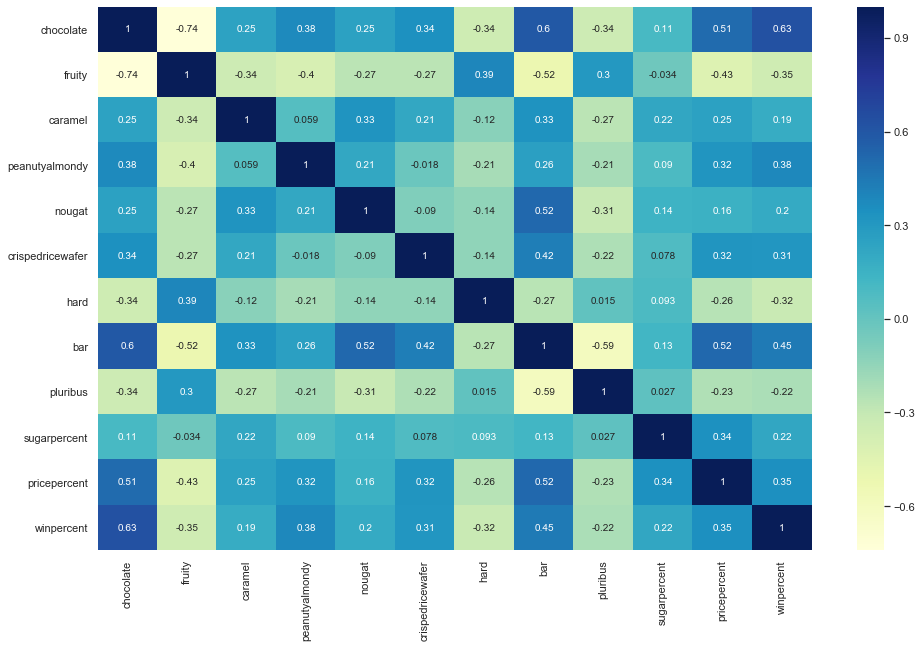

In [7]:
# calculate the correlation matrix
rcParams['figure.figsize'] = 16,10
corr = dfo.corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu",  annot=True)

--> Chocolate and nuts, in bar and higher price are positively correlated with attractiveness. 

--> Fruity and hard are negatively correlated

### Driving Forces - Regression

In [8]:
y = df['winpercent']
X = df.drop(columns=['winpercent'],inplace =False)
X = sm.add_constant(X)

C:\Users\vonNe\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
results = sm.OLS(y, X, hasconst=True).fit(cov_type='HC2')

In [10]:

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     8.285
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           3.18e-09
Time:                        23:17:41   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:                  HC2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.5340      4.106  

--> Positive statistically significant effect of chocolate, fruity, peanuty and sugarpercent

--> Negative effect of hard 

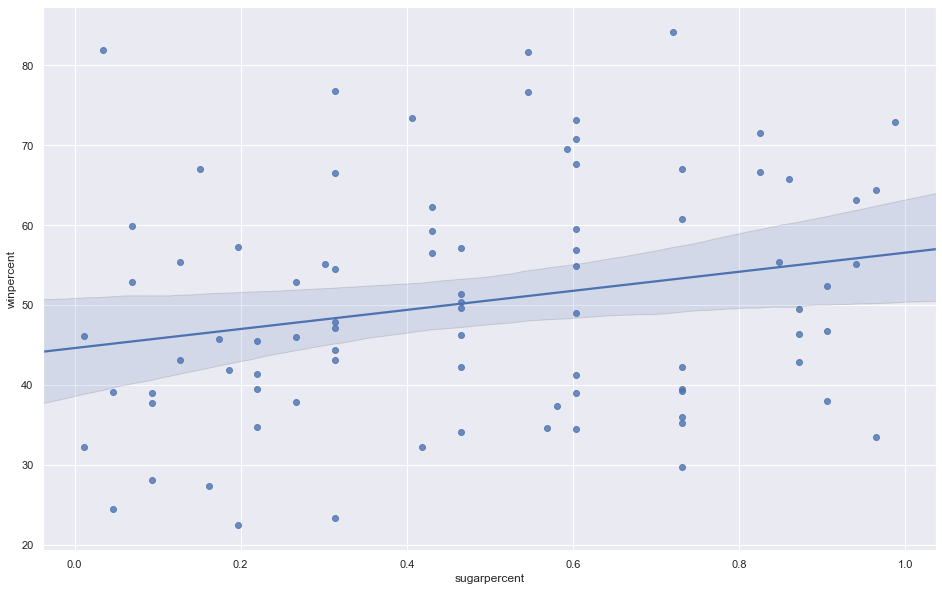

In [11]:
sns.regplot(x='sugarpercent',y='winpercent',data=df)

--> Positive effect of sugar to see

### Driving Forces - Interaction Effects

In [12]:
df_inter=dfo.copy(deep=True)
df_inter['chocolate_fruity'] = df_inter['chocolate']* df_inter['fruity']
df_inter['chocolate_peanutyalmondy'] = df_inter['chocolate']* df_inter['peanutyalmondy']
df_inter['fruity_peanutyalmondy'] = df_inter['fruity']* df_inter['peanutyalmondy']
df_inter['chocolate_crispedricewafer'] = df_inter['chocolate']* df_inter['crispedricewafer']

In [13]:
df_inter[['chocolate_fruity','chocolate_peanutyalmondy','fruity_peanutyalmondy','chocolate_crispedricewafer']].describe()

,chocolate_fruity,chocolate_peanutyalmondy,fruity_peanutyalmondy,chocolate_crispedricewafer
count,85.000000,85.000000,85.0,85.000000
mean,0.011765,0.141176,0.0,0.082353
std,0.108465,0.350270,0.0,0.276533
min,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,0.0,1.000000


--> No cases of fruity_peanutyamondy - **potential product!**

In [14]:
df_inter['chocolate_crispedricewafer'][(df_inter['chocolate']==0) &  (df_inter['crispedricewafer']==1)].count()

0

--> Crispy only with Chocolate - **potential combination of crispy with fruits and/or nuts without chocolate**

In [15]:
# Drop if no observations or not possible to identify the effect
df_inter.drop(columns=['fruity_peanutyalmondy','chocolate_crispedricewafer'],inplace = True)

In [16]:
y_inter = df_inter['winpercent']
X_inter = df_inter.drop(columns=['winpercent'],inplace =False)
X_inter = sm.add_constant(X_inter)

In [17]:
results = sm.OLS(y_inter, X_inter, hasconst=True).fit(cov_type='HC2')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     6.993
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.74e-08
Time:                        23:17:42   Log-Likelihood:                -313.52
No. Observations:                  85   AIC:                             655.0
Df Residuals:                      71   BIC:                             689.2
Df Model:                          13                                         
Covariance Type:                  HC2                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

--> Chocolate and fruits do not fit together

--> Customers like nuts only together with chocolate

In [18]:
df_inter[df_inter['chocolate_peanutyalmondy']==1].sort_values('winpercent',ascending = False).head(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate_fruity,chocolate_peanutyalmondy
competitorname,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,0,1
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,0,1
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,0,1
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,0,1
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,0,1
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,0,1
Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641,0,1
Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.593,0.651,69.483788,0,1
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,0,1


--> Examples of the best combinations

### Generate Unique Combinations of Tastes

In [19]:
# 3-letters Names
cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer'] #, 'hard', 'bar', 'pluribus'
names = ["" for i in range(0,len(cols))]
i=0
for col in cols:
    names[i] = col[0].upper()+col[1]+col[2]
    i=i+1

In [20]:
names

['Cho', 'Fru', 'Car', 'Pea', 'Nou', 'Cri']

In [21]:
for col,name in zip(cols,names):
    df[name]="" 
    df[name][df[col]==1]=name

C:\Users\vonNe\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Unique 
df['unique'] = ""
for name in names:
    df['unique'] = df['unique'] + df[name]
df['unique'][df['unique']==""]= "Other"

C:\Users\vonNe\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [23]:
df['unique'].nunique()

16

In [24]:
df['unique'].value_counts()

Fru             36
Cho             11
ChoPea           9
Other            6
ChoCri           4
Car              3
ChoCar           3
ChoNou           2
ChoCarNou        2
ChoCarCri        2
ChoCarPeaNou     2
FruCar           1
Pea              1
ChoCarPeaCri     1
PeaNou           1
ChoFru           1
Name: unique, dtype: int64

In [25]:
df.drop(columns=names,inplace=True)

In [26]:
df.sort_values(by=['unique'],inplace=True)

### t-SNE for Product Visualization

In [27]:
# Introduce Products with Higher Margins
df['pricy']=(df['pricepercent']>0.5)# To introduce price above average

In [28]:
# Visualization using t-SNE
X_tsne = df[X.columns[1:]]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=600, random_state=1)
tsne_results = tsne.fit_transform(X_tsne)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 84 nearest neighbors...
[t-SNE] Indexed 85 samples in 0.000s...
[t-SNE] Computed neighbors for 85 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 85 / 85
[t-SNE] Mean sigma: 0.866737
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.585403
[t-SNE] KL divergence after 600 iterations: 0.239577
t-SNE done! Time elapsed: 0.45302629470825195 seconds


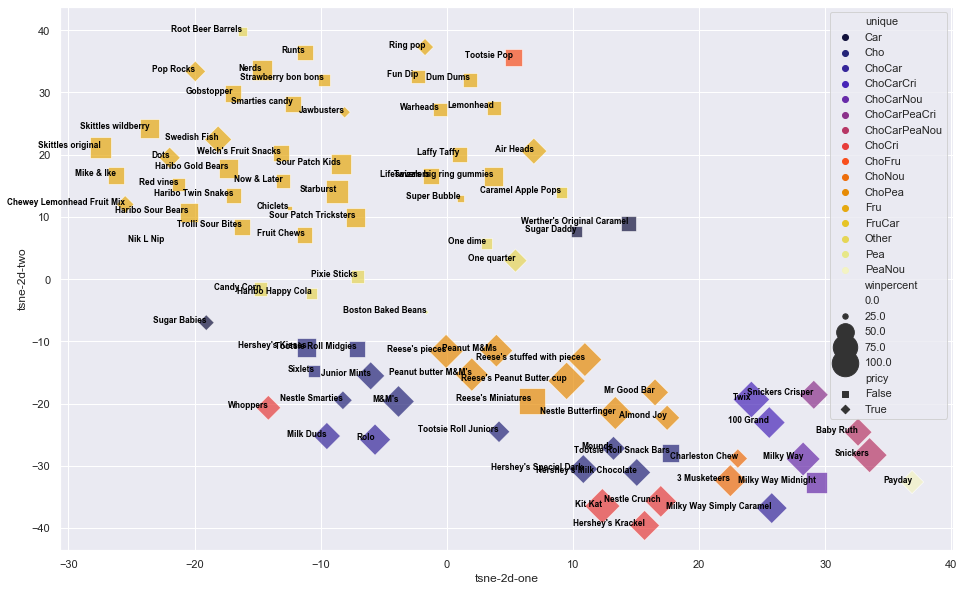

In [29]:
# Plot the Figure
# 90 degrees turned squares designate candies with the above average price - opportunity to undercut competitor prices
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
ax= sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    size="winpercent",
    sizes=(0, 700),
    style="pricy",
    markers=('s','D'),
    hue = "unique",
    palette=sns.color_palette("CMRmap", 16),
    data=df,
    legend="brief",
    alpha=0.7
)
for line in range(0,df.shape[0]):
     ax.text(df['tsne-2d-one'][line], df['tsne-2d-two'][line], df.index[line], horizontalalignment='right', size='small', color='black', weight='semibold')

* --> Nice summary visualization of the whole spectrum
* --> Pricy chocolate products are also the most popular ones
* --> Strong competition among Fruits and M&M's + Reese's Cluster (Chocolate-Peanuts)
* --> Less Competition for Chocolate-Caramel-Crispy, Chocolate-Caramel-Nougat, Chocolate-Caramel, Chocolate-Caramel-Nuts-Nougat,Chocolate-Caramel-Nuts-Crispy with high margins and attractiveness 

In [30]:
# Winpercent - Price Scatterplot
df_avg = df.groupby(by='unique').mean()
df_count = df['unique'].value_counts()
df_avg = pd.concat([df_avg,df_count],axis=1 )

C:\Users\vonNe\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


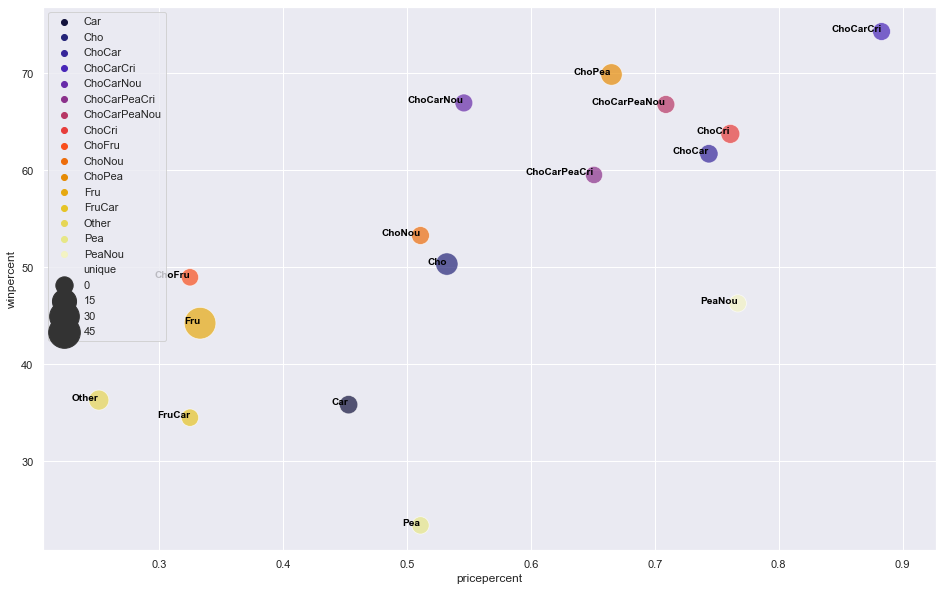

In [31]:
# Scatterplot of Segments
uniques = df.unique.unique().tolist()
ax= sns.scatterplot(
    x="pricepercent", y="winpercent",
    hue= uniques,
    palette= sns.color_palette("CMRmap", 16),
    size='unique',
    sizes= (300,1000),
    data= df_avg,
    s= 300,
    legend= "brief",
    alpha=0.7,
)
for line in range(0,df_avg.shape[0]):
     ax.text(df_avg['pricepercent'][line], df_avg['winpercent'][line], df_avg.index[line], horizontalalignment='right', size='medium', color='black', weight='semibold')

--> Confirms Chocolate-Caramel-Crispy, Chocolate-Caramel-Nuts-Nougat as attractive segments

In [32]:
# The winner is
df[df.unique=='ChoCarCri'][['unique', 'winpercent','pricepercent']]

,unique,winpercent,pricepercent
competitorname,,,
Twix,ChoCarCri,81.642914,0.906
100 Grand,ChoCarCri,66.971725,0.860


--> The most attractive market segment due to high winning rate and the opportunity to undercut prices

### Summary

* Positive driving forces of attractiveness: contains chocolate, fruits, nuts, more sugar and is crispy
* Potential segments for the totally new products (no such combinations in the market):
    * Fruits and nuts combined 
    * Crispy with fruits and/or nuts without chocolate
* Potential segments to undercut prices in the existing products:
    * Chocolate-Caramel-Crispy is a very popular and pricy but not densely populated market segment --> Attractive if our supermarket wants to introduce its product and undercut prices of the existing products in this segment